In [1]:
from tensorflow.keras import backend as K
K.clear_session()

In [2]:
!pip install rarfile

In [3]:
import gdown
import rarfile
import os

# Correct URL after permissions are updated
url = 'https://drive.google.com/uc?id=1FAUSzwEDHfLN_McqFpQ6a3VWoc6h9qgw'
output_rar = '/content/WHEAT.rar'

# Download the RAR file
gdown.download(url, output_rar, quiet=False)

# Check if the downloaded file is valid before extracting
if os.path.exists(output_rar):
    try:
        # Try to open the downloaded file as a RAR file
        with rarfile.RarFile(output_rar, 'r') as rar_ref:
            rar_ref.extractall('/content')
        print("File extracted successfully!")
    except rarfile.NotRarFile:
        print("Error: The downloaded file is not a valid RAR archive.")
else:
    print("Error: File not found.")

Downloading...
From (original): https://drive.google.com/uc?id=1FAUSzwEDHfLN_McqFpQ6a3VWoc6h9qgw
From (redirected): https://drive.google.com/uc?id=1FAUSzwEDHfLN_McqFpQ6a3VWoc6h9qgw&confirm=t&uuid=c8dc15e9-4ab7-4496-9efd-89d2c7adeaf9
To: /content/WHEAT.rar
100%|██████████| 228M/228M [00:04<00:00, 54.0MB/s]


File extracted successfully!


In [4]:
# Path to the extracted dataset folder

dataset = '/content/Wheat'

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,250,250 (58.18 MB)

 Trainable params: 15,250,250 (58.18 MB)

 Non-trainable params: 0 (0.00 B)

Found 4204 images belonging to 3 classes.
Found 598 images belonging to 3 classes.
Found 1198 images belonging to 3 classes.
Epoch 1/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 94s 658ms/step - accuracy: 0.3338 - loss: 1.8252 - val_accuracy: 0.3311 - val_loss: 1.0919
Epoch 2/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 64s 487ms/step - accuracy: 0.3693 - loss: 1.0632 - val_accuracy: 0.6438 - val_loss: 0.6797
Epoch 3/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 65s 490ms/step - accuracy: 0.7021 - loss: 0.6428 - val_accuracy: 0.7960 - val_loss: 0.5065
Epoch 4/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 65s 490ms/step - accuracy: 0.7652 - loss: 0.5436 - val_accuracy: 0.8161 - val_loss: 0.4687
Epoch 5/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 65s 491ms/step - accuracy: 0.7835 - loss: 0.5019 - val_accuracy: 0.8378 - val_loss: 0.4437
Epoch 6/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 65s 493ms/step - accuracy: 0.8096 - loss: 0.4659 - val_accuracy: 0.8244 - val_loss: 0.4364
Epoch 7/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 65s 492ms/step - accuracy: 0.8260 - loss: 0.4350 

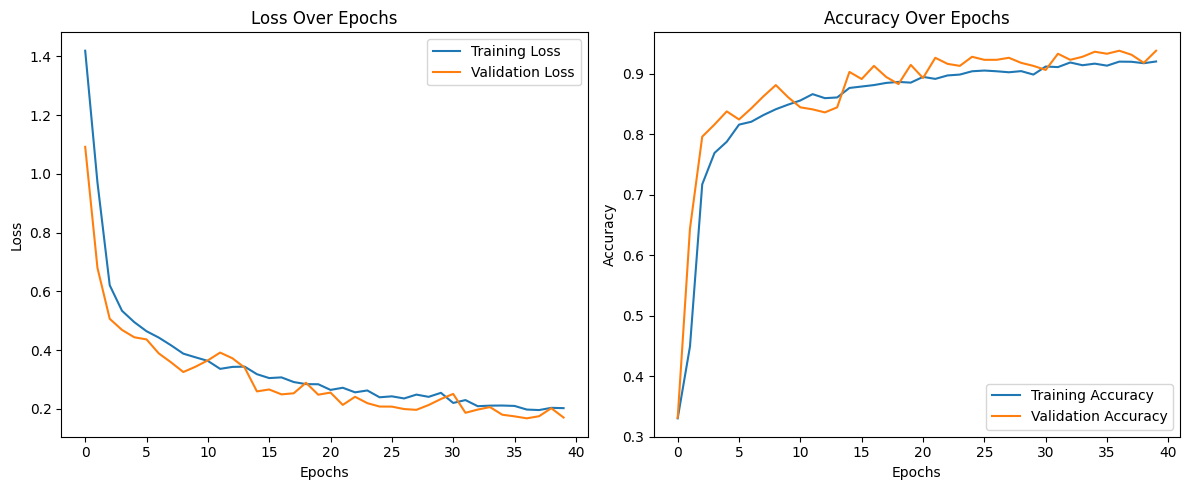

38/38 ━━━━━━━━━━━━━━━━━━━━ 13s 321ms/step

Performance on Test Data
Precision: 0.9274054320985375
Recall: 0.9232053422370617
F1 Score: 0.92373211686811
Accuracy: 0.9232053422370617
Confusion Matrix:
              Brown_Rust  Healthy  Yellow_Rust
Brown_Rust          357        5           38
Healthy               7      365           26
Yellow_Rust          10        6          384


In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Directory for the dataset
data_dir = dataset  # Replace with your dataset path

# Load VGG16 without pre-trained weights, include_top=False to customize the output
base_model = VGG16(weights=None, include_top=False, input_shape=(224, 224, 3))

# Make sure all layers are trainable
base_model.trainable = True

# Add custom classification head
inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=True)
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)  # Adjust number of classes as needed

# Build the full model
model = Model(inputs, outputs)

# Print model summary
model.summary()

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.00001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators
train_generator = train_datagen.flow_from_directory(
    os.path.join(data_dir, 'train'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    os.path.join(data_dir, 'validation'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(data_dir, 'test'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

# Train the model
history = model.fit(train_generator, epochs=40, validation_data=val_generator)

# Plot training results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluation function
def evaluate_model(test_generator, model, classes, title="Performance"):
    y_test_pred = model.predict(test_generator)
    y_test_pred = np.argmax(y_test_pred, axis=1)

    precision = precision_score(test_generator.labels, y_test_pred, average='weighted')
    recall = recall_score(test_generator.labels, y_test_pred, average='weighted')
    f1 = f1_score(test_generator.labels, y_test_pred, average='weighted')
    accuracy = accuracy_score(test_generator.labels, y_test_pred)

    print(f"\n{title}")
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Accuracy:", accuracy)

    # Confusion matrix
    confusion = confusion_matrix(test_generator.labels, y_test_pred)
    confusion_df = pd.DataFrame(confusion, index=classes, columns=classes)
    print("Confusion Matrix:\n", confusion_df)

# Evaluate the model
evaluate_model(test_generator, model, ['Brown_Rust', 'Healthy', 'Yellow_Rust'], title="Performance on Test Data")
